**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

# **Part 1:  From scratch K-means Implementation**
See the following cells as a guide to implementing Kmeans WITHOUT the use of any clustering library functions.

In [25]:
#Import relevant libraries
import random
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from sklearn.datasets._samples_generator import make_blobs
from sklearn.datasets._samples_generator import make_moons
import seaborn as sns
import doctest
%matplotlib inline

**Part 1a**:  
Follow the reference script to create YOUR OWN implementation of K-means (not using Scikit-learn or other machine learning libraries which include Kmeans functions).  The script will provide the linear dataset which was covered in the lecture notes.  
- Implement a class and supporting methods/functions to generate a 3-cluster model from the dataset.  See the provided code template for a step-by-step guide.  Use the full dataset provided in the script (do not perform a train/test split).  Your final code will generate the cluster center (centroid) locations as described in the lecture notes:  [ [25.2, 0], [3.5, 0], [12.6, 0] ].
- You may call your function with the number of clusters set to 3; i.e. no need to find the optimal number of clusters using an elbow or other method.
- Implement a euclidean distance calculator function:  calcdist(). See the template script for the API and function requirements.
- Implement a class called Kmeans with constructor, fit(), and evaluate() functions. See the provided script for a step-by-step guide.
- Test your code with at least 2 new data points and record the cluster/class they would be assigned, (i.e. what output class are the test points assigned to).
- Implement visualization function(s) to plot the data along with the calculated cluster centroid positions, and with the test data points and marker (i.e. a line) from the test point to the best centroid position representing the assigned class.



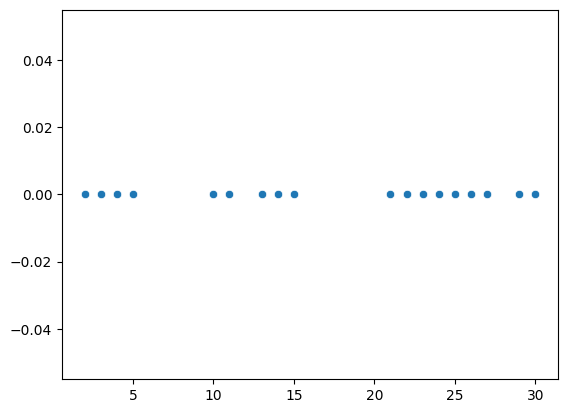

In [26]:
#Construct linear dataset
data = np.array([[2,0],[3,0],[4,0],[5,0],[10,0],[11,0],\
              [13,0],[14,0],[15,0],[21,0],[22,0],[23,0],\
              [24,0],[25,0],[26,0],[27,0],[29,0],[30,0]])
sns.scatterplot(x=data[:,0], y=data[:,1])
plt.show()

In [27]:
#Define euclidean distance between a point and the dataset
#def calcdist(point, data):
  #return None
def calcdist(point, data):
    return np.sqrt(np.sum((data - point)**2, axis=1))


In [28]:
#Test the distance calculator function
testpoint = np.array([0,0])
testdata = np.array([[1,2], [3,4], [5,12], [8,15]])
print(calcdist(testpoint, testdata))
testpoint2 = np.array([-1, 5])
testdata2 = np.array([[3, 4], [9, 1], [-5, 2], [7, 20]])
print(calcdist(testpoint2, testdata2))


import doctest
"""
   >>> print(calcdist(testpoint, testdata))
   [ 2.23606798  5.         13.         17.        ]
   >>> print(calcdist(testpoint2, testdata2))
   [ 4.12310563 10.77032961  5.         17.        ]
"""

doctest.testmod()

[ 2.23606798  5.         13.         17.        ]
[ 4.12310563 10.77032961  5.         17.        ]


TestResults(failed=0, attempted=2)

Implement visualization function(s) to plot the data along with the calculated cluster centroid positions, and with the test data points and marker (i.e. a line) from the test point to the best centroid position representing the assigned class.

Your outputs should display the clusters in different colors, a marker for the cluster center (centroid) position, and generate a random test point which is mapped to the best (nearest) cluster.  See the examples shown and code template below.

![alt text](https://drive.google.com/uc?id=1tRVT9d2vj6yZAJLJQHbekA1xxPCAZAzg)

![alt text](https://drive.google.com/uc?id=1dw3tDYAt4x5115Xn4Viq-oC1Ew2Paeud)


In [30]:
#Function to plot color-coded clusters, and cluster centers
# def plot_clusters(data, labels, num_clusters, cluster_centers):
#     data = input dataset
#     num_clusters = number of calculated clusters
#     cluster_centers = calculated cluster centers (centroid) positions
#     labels = array mapping each datapoint to a cluster.
#         Example, labels [0 1 0 1 0 2 0 0 0 0 1 0 0 2 0] maps the following:
#                   data[0] --> 0
#                   data[1] --> 1
#                   data[2] --> 0
#                   data[5] --> 2
#                   etc.
#     Algorithm:
#         Create a list of colors to separate the cluster colors
#         Loop through the number of clusters
#             set the cluster color by indexing into the list of colors
#             Loop through the dataset
#               assign the data to the cluster color if its label is in the cluster
#             Plot the data in the cluster

#def plot_clusters(data, labels, num_clusters, cluster_centers):
  #YOUR CODE HERE
def plot_clusters(data, labels, num_clusters, cluster_centers):
  colors = ['blue', 'red', 'green', 'purple', 'orange', 'pink']  # Extend as needed
  for i in range(num_clusters):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i])
    plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], c='black', marker='x')
  plt.show()


In [32]:
#Function to classify a new data point placed somewhere in the sample space
#If 'stand_alone_plot' param is set True then it will create a seperate plot
#
#   def plot_test_point(X, centers, stand_alone_plot=False):
#     X = dataset
#     centers = calculated cluster centers (centroid) positions
#     stand_alone_plot = True if plot on top of clusters (if run the plot_clusters function)
#
#   Algorithm:
#     Find a random point in the data space
#       hint:  find the  min and max in the dataset and generate a point from random.uniform(min, max)
#     Calculate the distances from the test point to the array of cluster centers
#       hint:  the distances will be an array of distances with distance index = cluster index
#     Find the index of the minimum of the distances (this will be the index into the cluster center array)
#     Index into the cluster centers based on the minimum distance
#     Place a marker on the plot for the random point
#     Draw a line from the random point to the nearest cluster center

#def plot_test_point(X, centers, stand_alone_plot=False):
  #YOUR CODE HERE

def plot_test_point(X, centers, stand_alone_plot=False):
  test_point = np.random.uniform(np.min(X), np.max(X), size=(1,2))
  distances = calcdist(test_point, centers)
  closest_center = np.argmin(distances)

  if stand_alone_plot:
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x')

  plt.scatter(test_point[:, 0], test_point[:, 1], c='yellow', marker='s')
  plt.plot([test_point[:, 0], centers[closest_center, 0]], [test_point[:, 1], centers[closest_center, 1]], c='yellow')

  plt.show()

  print(f'Test point {test_point} belongs to the cluster with center at {centers[closest_center]}')

##Implement the KMeans class

<br>

Algorithm:  

1. Randomly place K markers (called centroids), one for each cluster.  

2. Calc the distance of each point from the centroid, e.g. Euclidean
We typically normalize the features that are used to define the dataset so that one parameter doesn't dominate the distance calc.  

3. Assign each data point (object) to its closest centroid, creating a cluster.  

4. Recalculate the position of the K centroids.  

5. Repeat steps 1-4 until the centroids no longer move.  

6. Calculate variances then Repeat steps 1-5 using K new randomly placed centroids for N user defined iterations are complete.  

7. Assign the data to clusters which had the smallest saved variance.  

<br>

Constructor:  
**def __init__(self, n_clusters=3, max_iter=800):**
- Initialize instance variables for the number of clusters, max iterations, the current centroid locations, and best centroid locations


Fit method:  
**def fit(self, X_train):**    

**1**. Randomly place K markers (called centroids), one for each cluster.  
   - Compute min, max in X_train. Hints:   
   https://numpy.org/doc/stable/reference/generated/numpy.minimum.html
   https://numpy.org/doc/stable/reference/generated/numpy.maximum.html  
   - Init centroids = uniform distributed between min and max for all n_clusters.  Hints:  
   https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
   - Initialize iteration count = 0, and previous centroids = empty  

- Loop over the max iterations *(while iteration < max_iter:)*
     - Create an empty list of sorted points for each of the clusters.  Hint:  
        *list_of_lists = [[] for _ in range(n)]*, where n is the number of clusters
     - Loop over the datapoints in X_train

      **2**. Calc the distance from each data point to the centroid.  Hints:  
      Call calcdist() to calculate distance between datapoint and each of the centroids and find the index of the centroid with that minimum distance.  
      https://numpy.org/doc/stable/reference/generated/numpy.argmin.html

      **3**. Assign each data point (object) to its closest centroid, creating a cluster.  Hint:  
      https://numpy.org/doc/stable/reference/generated/numpy.append.html

  **4**. Recalculate the position of the K centroids.  
   - Update previous centroids = current centroids
   - Calc the mean of the points assigned to the centroid cluster from step 3.  Make sure to check for nan's in case no points where assigned to the centroid, and in that case set the centroid to the previous centroid.

  **5**. Increment *iteration*
  
  **6**. Calculate variances then Repeat steps 1-5 using K new randomly placed centroids for N user defined iterations are complete.  


<br>

Evaluate method:  
**def evaluate(self, X):**  
- Classify test points based on the minimum distance to the cluster centers (centroids).  e.g. create an array of centroid indices aligned to X
- for each x in X
  - calculate the distances to all the centroids
  - find the centroid with the minimimum distance
  - append the centroid index with minimum distance to the array


In [33]:


class KMeans:
    def __init__(self, n_clusters=3, max_iter=800):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.best_centroids = None

    def fit(self, X_train):
        min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        prev_centroids = None
        iteration = 0

        while iteration < self.max_iter:
            self.centroids = np.random.uniform(min_, max_, (self.n_clusters, X_train.shape[1]))
            while not np.array_equal(self.centroids, prev_centroids):
                prev_centroids = self.centroids.copy()
                sorted_points = {i: [] for i in range(self.n_clusters)}

                for point in X_train:
                    dists = np.linalg.norm(point - self.centroids, axis=1)
                    centroid_idx = np.argmin(dists)
                    sorted_points[centroid_idx].append(point)

                for i in range(self.n_clusters):
                    if sorted_points[i]:
                        self.centroids[i] = np.mean(sorted_points[i], axis=0)
                    else:
                        self.centroids[i] = prev_centroids[i]

            min_centroid_variance = np.inf
            total_cluster_var = 0
            cluster_count = 0

            for points in sorted_points.values():
                if points:
                    cluster_var = np.var(points)
                    total_cluster_var += cluster_var
                    cluster_count += 1
            if total_cluster_var / cluster_count < min_centroid_variance:
                min_centroid_variance = total_cluster_var / cluster_count
                self.best_centroids = self.centroids.copy()

            iteration += 1
        print('Centroids with min variance', self.best_centroids)

    def evaluate(self, X):
        centroids = np.zeros(X.shape)
        centroid_idxs = np.zeros(X.shape[0])

        for idx, point in enumerate(X):
            dists = np.linalg.norm(point - self.best_centroids, axis=1)
            centroid_idx = np.argmin(dists)
            centroids[idx] = self.best_centroids[centroid_idx]
            centroid_idxs[idx] = centroid_idx
        return centroids, centroid_idxs


In [35]:
from sklearn.model_selection import train_test_split
x=data[:,0]
y=data[:,1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [36]:
#Runner Part 1a
#Instantiate a KMeans object from your class implementation in Part 1a.
#Set the number of clusters to 3, and the number of iterations to 50.
#kmeans = None

#Fit the data
#None



#Evaluate the test data
#class_centers, classification = None

# Instantiate a KMeans object
kmeans = KMeans(n_clusters=3, max_iter=50)


# Assume X_train is your training dataset
kmeans.fit(data)



# Assume X_test is your test dataset

class_centers, classification = kmeans.evaluate(data)

# Now you can print the best centroids

print(np.sort(np.ravel(kmeans.best_centroids)))

#plot_clusters(data, cluster_labels, 3, cluster_centers)
#plot_test_point(data, cluster_centers)


import doctest
"""
   >>> print(np.sort(np.ravel(kmeans.best_centroids)))
   [ 0.          0.          0.          3.5        12.6        25.22222222]
"""

doctest.testmod()


Centroids with min variance [[12.6         0.        ]
 [ 3.5         0.        ]
 [25.22222222  0.        ]]
[ 0.          0.          0.          3.5        12.6        25.22222222]


TestResults(failed=0, attempted=1)

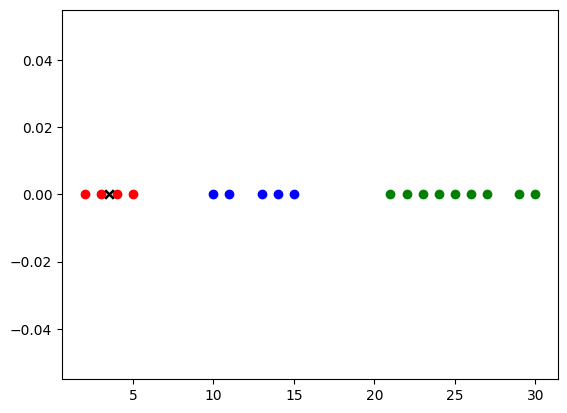

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


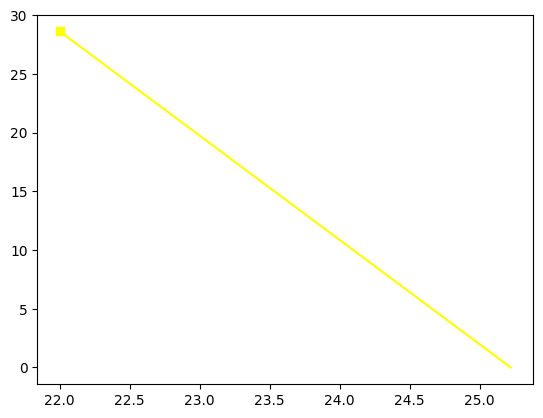

Test point [[22.00090852 28.60662461]] belongs to the cluster with center at [25.22222222  0.        ]


In [37]:
cluster_centers, cluster_labels = kmeans.evaluate(data)
plot_clusters(data, cluster_labels, 3, cluster_centers)
plot_test_point(data, cluster_centers)

Cluster centers [[ 3.5         0.        ]
 [ 3.5         0.        ]
 [ 3.5         0.        ]
 [ 3.5         0.        ]
 [12.6         0.        ]
 [12.6         0.        ]
 [12.6         0.        ]
 [12.6         0.        ]
 [12.6         0.        ]
 [25.22222222  0.        ]
 [25.22222222  0.        ]
 [25.22222222  0.        ]
 [25.22222222  0.        ]
 [25.22222222  0.        ]
 [25.22222222  0.        ]
 [25.22222222  0.        ]
 [25.22222222  0.        ]
 [25.22222222  0.        ]]
Cluster labels: [1. 1. 1. 1. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
kmeans best centroids: [[12.6         0.        ]
 [ 3.5         0.        ]
 [25.22222222  0.        ]]


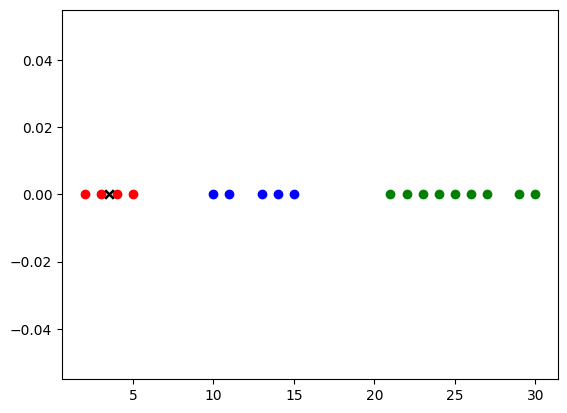

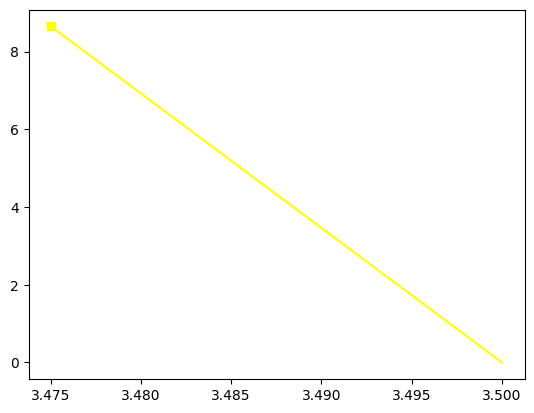

Test point [[3.47503231 8.64552517]] belongs to the cluster with center at [3.5 0. ]


In [38]:
#Visualize the dataset with cluster centers and test point mapped to best cluster center
#Use your own function or the provided function calls (based on the previous plot functions).

print('Cluster centers', class_centers)
print('Cluster labels:', classification)
print('kmeans best centroids:', kmeans.best_centroids)

labels = np.array(classification)
plot_clusters(data, labels, 3, class_centers )
plot_test_point(data, kmeans.best_centroids)


**Part 1b**:  


- Create at least 2 datasets of 3 clusters each.  The script will use the Scikit-learn ‘make_blobs’ function to produce specific test datasets for you, but you should also experiment with different numbers of clusters and different standard deviation settings.  Note, the script will set a 'random_state' to create 2 known datasets, you must use those datasets in your testing so that the doctests pass.
- Implement your code to create 3 clusters from the dataset.  See the code template for a step-by-step guide.  Use the full dataset provided in the script (do not perform a train/test split).
- Test your code with at least 2 new data points and record the cluster they would be assigned, i.e. output class.  
- Upload a screenshot of your test outputs.  Show a plot of the dataset overlaid with the cluster centroid positions, and a line connecting the test point to the selected cluster.

Dataset "blob dataset 1" should look like this:  

![alt text](https://drive.google.com/uc?id=1jDqPMLQOsh6dCeV1mBSAz8b8e0bVb8Vr)


Dataset "blob dataset 2" should look like this:  

![alt text](https://drive.google.com/uc?id=1RrmuFVumj-GhtCIMn5RyueUQpYpDCtg1)


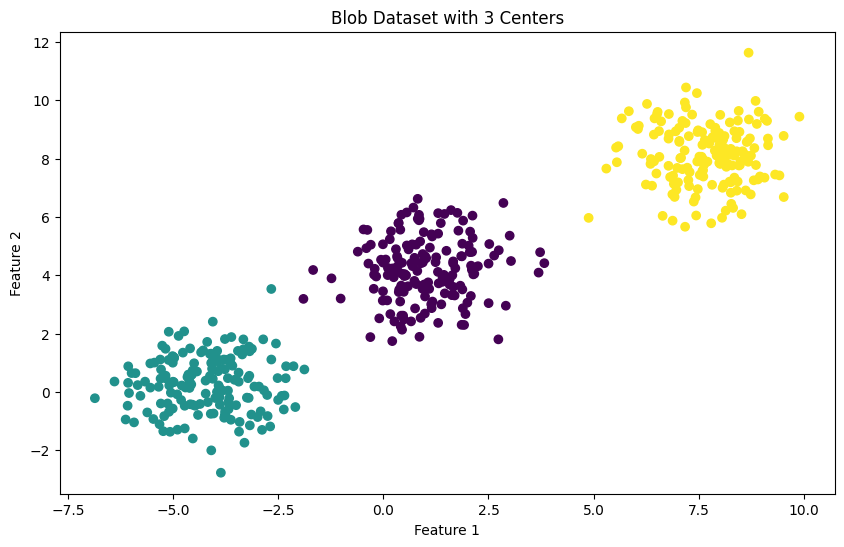

In [39]:
#Construct a blob dataset 1
# DO NOT change the make_blob function parameters.

centers = 3
data, blob = make_blobs(n_samples=500, centers=centers, cluster_std=1, random_state=3)

#Plot the dataset
# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(data[:,0], data[:,1], c=blob, cmap='viridis')
plt.title("Blob Dataset with 3 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [40]:
#Runner Part 1b
#Instantiate a KMeans object from your class implementation in Part 1a.
#Set the number of clusters to 3, and the number of iterations to 50.

#kmeans = None

#Fit the data
None

#Evaluate the test data
#class_centers, classification = None


# Instantiate a KMeans object
kmeans = KMeans(n_clusters=3, max_iter=50)

# Assume X_train is your training dataset
kmeans.fit(data)

# Assume X_test is your test dataset
class_centers, classification = kmeans.evaluate(data)

# Now you can print the best centroids
print(np.sort(np.ravel(kmeans.best_centroids)))



import doctest
"""
   >>> print(np.sort(np.ravel(kmeans.best_centroids)))
   [-4.18726897  0.27543154  1.01450711  4.20318963  7.67197216  8.11134342]
"""

doctest.testmod()

Centroids with min variance [[-4.18726897  0.27543154]
 [ 1.01450711  4.20318963]
 [ 7.67197216  8.11134342]]
[-4.18726897  0.27543154  1.01450711  4.20318963  7.67197216  8.11134342]


TestResults(failed=0, attempted=1)

In [41]:
# Instantiate a KMeans object from your class implementation

kmeans = KMeans(n_clusters=3, max_iter=50)

# Fit the model to your data
kmeans.fit(data)

# Evaluate the model on the same data
class_centers, classification = kmeans.evaluate(data)

# The class_centers and classification variables now hold the model's centroids and the classification of each data point respectively.



Centroids with min variance [[ 1.01450711  4.20318963]
 [-4.18726897  0.27543154]
 [ 7.67197216  8.11134342]]


Cluster centers [[-4.18726897  0.27543154]
 [ 1.01450711  4.20318963]
 [-4.18726897  0.27543154]
 [ 1.01450711  4.20318963]
 [-4.18726897  0.27543154]
 [ 7.67197216  8.11134342]
 [-4.18726897  0.27543154]
 [-4.18726897  0.27543154]
 [-4.18726897  0.27543154]
 [-4.18726897  0.27543154]
 [ 1.01450711  4.20318963]
 [-4.18726897  0.27543154]
 [-4.18726897  0.27543154]
 [ 7.67197216  8.11134342]
 [-4.18726897  0.27543154]
 [-4.18726897  0.27543154]
 [-4.18726897  0.27543154]
 [-4.18726897  0.27543154]
 [ 7.67197216  8.11134342]
 [ 7.67197216  8.11134342]
 [ 1.01450711  4.20318963]
 [ 1.01450711  4.20318963]
 [-4.18726897  0.27543154]
 [-4.18726897  0.27543154]
 [ 7.67197216  8.11134342]
 [-4.18726897  0.27543154]
 [ 7.67197216  8.11134342]
 [ 1.01450711  4.20318963]
 [ 7.67197216  8.11134342]
 [ 1.01450711  4.20318963]
 [ 1.01450711  4.20318963]
 [-4.18726897  0.27543154]
 [ 1.01450711  4.20318963]
 [ 1.01450711  4.20318963]
 [ 1.01450711  4.20318963]
 [ 1.01450711  4.20318963]
 [ 1.0145071

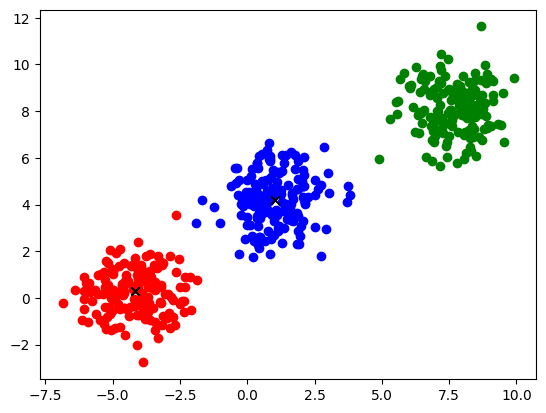

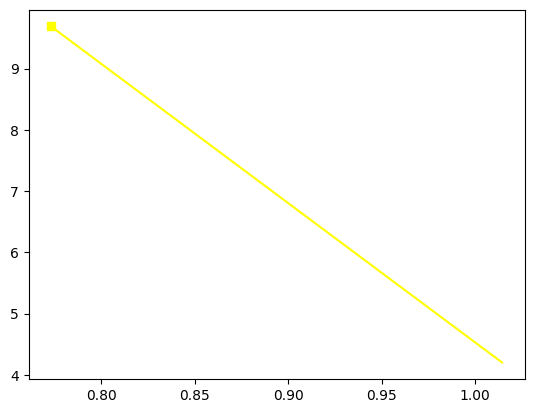

Test point [[0.77310628 9.68804734]] belongs to the cluster with center at [1.01450711 4.20318963]


In [42]:
#Visualize the dataset with cluster centers and test point mapped to best cluster center
#Use your own function or the provided function calls (based on the previous plot functions)

print('Cluster centers', class_centers)
print('Cluster labels:', classification)
print('kmeans best centroids:', kmeans.best_centroids)

labels = np.array(classification)
plot_clusters(data, labels, 3, class_centers )
plot_test_point(data, kmeans.best_centroids)


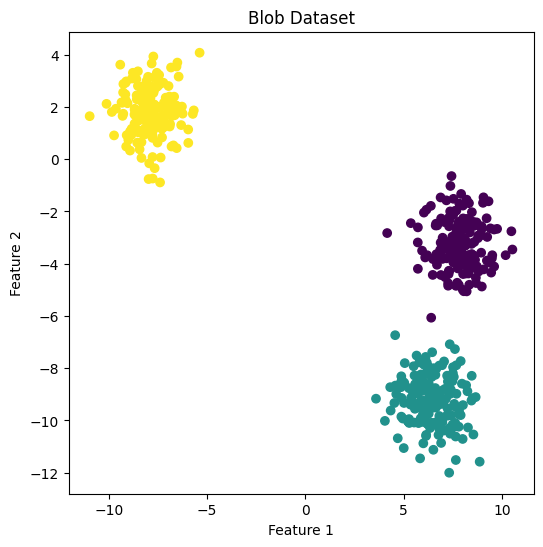

In [43]:
#Construct a blob dataset 2
# DO NOT change the make_blob function parameters.
centers = 3
data, blob = make_blobs(n_samples=500, centers=centers, cluster_std=1, random_state=6)


# Plot the dataset
plt.figure(figsize=(6,6))
plt.scatter(data[:, 0], data[:, 1], c=blob)
plt.title('Blob Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [44]:
#Runner Part 1b
#Instantiate a KMeans object from your class implementation in Part 1a.
#Set the number of clusters to 3, and the number of iterations to 50.

#kmeans = None

#Fit the data
#None

#Evaluate the test data
#class_centers, classification = None


#NOTE - there are no doctests for this dataset since Kmeans should not consistently
#       cluster the data properly.

# Instantiate a KMeans object from your class implementation in Part 1a.
# Set the number of clusters to 3, and the number of iterations to 50.
kmeans = KMeans(n_clusters=3, max_iter=50)

# Fit the data
kmeans.fit(data)

# Evaluate the test data
class_centers, classification = kmeans.evaluate(data)



Centroids with min variance [[-8.35451069  1.09935414]
 [-7.5842866   2.39993293]
 [ 7.15948124 -6.25225734]]


Cluster centers [[ 7.15948124 -6.25225734]
 [-7.5842866   2.39993293]
 [-7.5842866   2.39993293]
 [-7.5842866   2.39993293]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [-8.35451069  1.09935414]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [-7.5842866   2.39993293]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [-7.5842866   2.39993293]
 [-7.5842866   2.39993293]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [ 7.15948124 -6.25225734]
 [-8.3545106

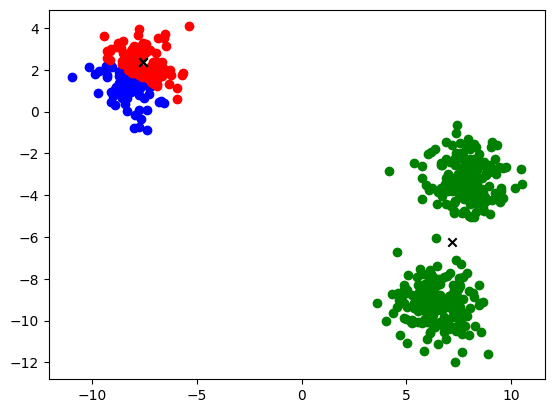

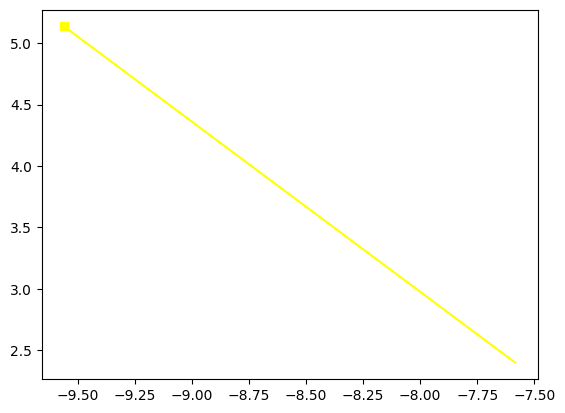

Test point [[-9.55961024  5.13603709]] belongs to the cluster with center at [-7.5842866   2.39993293]


In [45]:
#Visualize the dataset with cluster centers and test point mapped to best cluster center
#Use your own function or the provided function calls (based on the previous plot functions).


print('Cluster centers', class_centers)
print('Cluster labels:', classification)
print('kmeans best centroids:', kmeans.best_centroids)

labels = np.array(classification)
plot_clusters(data, labels, 3, class_centers )
plot_test_point(data, kmeans.best_centroids)

#Note the cluster centers on your plot - did the model perform well?


# **Part 2:  Sci-kit Learn K-means Implementation**

**Part 2a**:  
Repeat Part 1a, Part 1b (using blob dataset 1 only), with the Scikit-learn Kmeans library functions.  Calculate the Silhouette score and compare your results with Part 1.

<br>


**Part 2b**:   
Use the Scikit-learn make_blobs function to create a dataset a random number of clusters selected between  5 and 8 inclusive, with 500 samples, and standard deviation of 1.  Find the optimum number of clusters using an iterative approach (e.g. a loop) testing between 1 and 15 clusters.  Plot your results on an elbow curve and confirm that 5 clusters is optimum.  Calculate the Silhouette score.  Information and background on the Silhouette score is provided below.  

An example elbow curve is shown below.


![alt text](https://drive.google.com/uc?id=1rTxaIXgghl95uSSR2rUPDRCwtMSEPpjs)


**Part 2c**:   
Use the Sci-kit learn ‘make_moons’ function to create a 2-cluster overlapping dataset, with 500 samples and noise of 0.05.  See the code template provided with this assignment for a step-by-step guide.   Run the Sci-kit learn Kmeans function to cluster the data.  Describe what you observe.  Calculate the Silhouette score.  Information and background on the Silhouette score is provided below.   

![alt text](https://drive.google.com/uc?id=1QGxMtqms5oWFSiKlo6GPKgjqJj0XzeVX)

<br>

**Silhouette Score background**

Evaluate the performance of Part 2 (Part 2a, Part 2b, Part 2c, Part2d) using the Mean Silhouette Coefficient.

If the true cluster labels are unknown, the model itself can be used to evaluate performance using the Silhouette Coefficient.
The Silhouette Coefficient range is [-1, 1], with best value == 1 and worst == -1.  A higher score indicates that the model has well defined and more dense clusters.  Values close to 0 indicate overlapping clusters, while negative values usually indicate that data points have been assigned to the wrong clusters.  See the Ref paper: Silhouettes: A graphical aid to the interpretation and validation of cluster analysis:  https://www.sciencedirect.com/science/article/pii/0377042787901257?via%3Dihub


$$s = \frac{b-a}{max(b-a)} $$


where:
a: The average distance between one data point and all other points in the same cluster
b: The average distance between one data point and all other points in the next nearest cluster.



See:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html for more information on the silhouette score.



In [46]:
#Import the Sci-kit learn libraries
from sklearn.cluster import KMeans
from sklearn import metrics

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers [[25.22222222  0.        ]
 [ 3.5         0.        ]
 [12.6         0.        ]]
Cluster labels: [1 1 1 1 2 2 2 2 2 0 0 0 0 0 0 0 0 0]


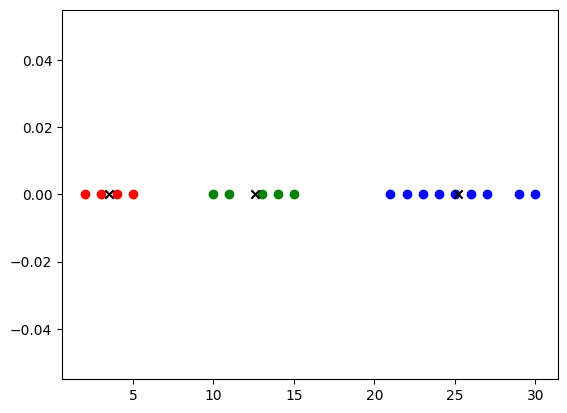

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


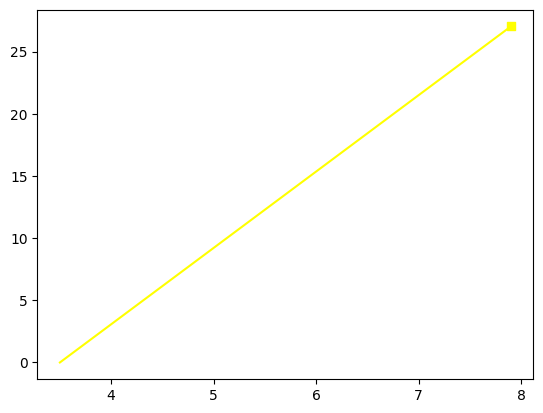

Test point [[ 7.89902463 27.02456786]] belongs to the cluster with center at [3.5 0. ]
0.7174938447199704


TestResults(failed=0, attempted=3)

In [53]:
#Part 2a - 1
#Recreate the linear dataset from Part 1 and run Kmeans
data2 = np.array([[2,0],[3,0],[4,0],[5,0],[10,0],[11,0],\
              [13,0],[14,0],[15,0],[21,0],[22,0],[23,0],\
              [24,0],[25,0],[26,0],[27,0],[29,0],[30,0]])


#Instantiate Kmeans from the sklearn library

km = KMeans(n_clusters=3)

#Set the number of clusters to 3


#Fit the model

km.fit(data2)

#Save the cluster labels,  cluster centers, and inertia (performance measure)


km_labels = km.labels_
km_cluster_centers = km.cluster_centers_
km_inertia = km.inertia_



#Visualize the dataset with cluster centers and test point mapped to best cluster center
#Use your own function or the provided function calls (based on the previous plot functions)
print('Cluster centers', km_cluster_centers)
print('Cluster labels:', km_labels)
plot_clusters(data2, km_labels, 3, km_cluster_centers )
plot_test_point(data2, km_cluster_centers)

#Calculate the silhouette score
#silhouette_score = None

silhouette_score = metrics.silhouette_score(data2, km_labels)
print(silhouette_score)
import doctest
"""
   >>> print(np.sort(np.ravel(km_cluster_centers)))
   [ 0.          0.          0.          3.5        12.6        25.22222222]
   >>> print(np.round(km_inertia, 3))
   97.756
   >>> print(np.round(metrics.silhouette_score(data2, km_labels), 3))
   0.717
"""

doctest.testmod()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers [[ 7.67197216  8.11134342]
 [ 1.01450711  4.20318963]
 [-4.18726897  0.27543154]]
Cluster labels: [2 1 2 1 2 0 2 2 2 2 1 2 2 0 2 2 2 2 0 0 1 1 2 2 0 2 0 1 0 1 1 2 1 1 1 1 1
 2 0 0 0 0 0 2 1 1 1 0 2 1 2 2 2 2 1 2 2 1 2 1 2 2 0 2 1 0 0 0 1 0 1 1 2 2
 1 1 2 1 1 1 2 0 1 2 0 1 1 1 2 1 0 2 2 0 2 1 0 1 1 2 2 2 1 1 2 2 0 2 2 1 1
 2 1 0 0 0 0 0 1 2 0 0 0 0 2 0 0 0 1 2 0 2 2 2 0 1 0 0 1 0 2 0 2 0 2 0 1 0
 2 1 2 0 1 1 0 2 2 1 2 0 1 2 1 0 1 1 1 0 0 1 0 1 0 2 1 0 2 2 0 1 0 2 1 0 1
 2 1 1 0 2 0 1 2 0 2 0 2 1 1 2 0 0 0 0 2 0 0 0 1 1 0 0 0 0 1 0 2 1 0 1 0 1
 0 1 1 2 0 1 2 1 2 2 1 1 1 0 2 0 2 1 1 1 2 0 2 0 2 0 0 0 2 2 2 1 2 0 1 2 0
 1 2 2 2 0 0 2 1 1 1 2 1 2 0 2 0 1 2 2 2 2 1 0 2 2 1 0 2 1 1 0 1 2 2 2 1 2
 1 1 2 0 1 2 1 0 2 0 1 2 1 0 0 1 2 0 2 0 0 1 0 2 1 1 1 1 0 0 1 2 0 1 2 0 2
 2 1 1 0 1 1 1 0 0 2 0 0 1 2 2 1 1 1 0 1 0 2 1 1 0 0 0 1 2 0 0 2 0 2 0 0 0
 0 2 1 2 1 0 0 2 2 1 2 1 0 1 2 0 0 2 2 2 1 0 2 0 0 0 2 1 2 2 2 0 1 1 2 1 1
 0 2 0 2 0 2 1 1 2 2 2 1 1 2 2 0 0 2 0 1 0 2 0 1 0 2 1 1 0 1 

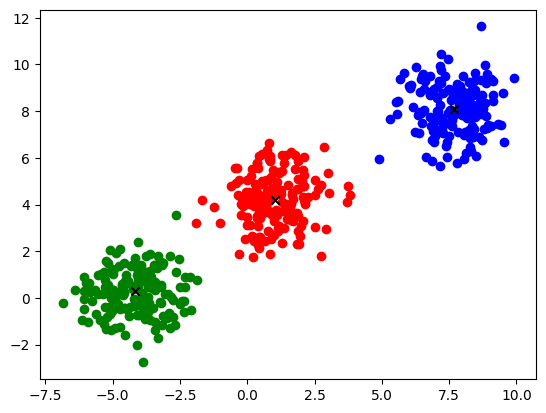

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


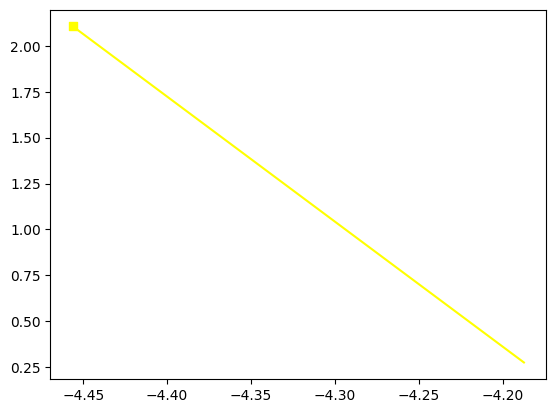

Test point [[-4.45612974  2.10523798]] belongs to the cluster with center at [-4.18726897  0.27543154]
0.7324959111151882


TestResults(failed=0, attempted=3)

In [57]:
#Part 2a - 2
#Reconstruct a blob dataset 1
# DO NOT change the make_blob function parameters.

centers = 3
data3, blob = make_blobs(n_samples=500, centers=centers, cluster_std=1, random_state=3)


#Instantiate Kmeans from the sklearn library
#Set the number of clusters to 3, and the init parameter to 'random' (random cluster center positions)

km2 = KMeans(n_clusters=3,init='random')

#Fit the model

km2.fit(data3)
#Save the cluster labels,  cluster centers, and inertia (performance measure)

#km = None
#km_labels2 = None
#km_cluster_centers2 = None
#km_inertia2 = None

km2_labels = km2.labels_
km2_cluster_centers = km2.cluster_centers_
km2_inertia = km2.inertia_

#Visualize the dataset with cluster centers and test point mapped to best cluster center
#Use your own function or the provided function calls (based on the previous plot functions)
print('Cluster centers', km2_cluster_centers)
print('Cluster labels:', km2_labels)
plot_clusters(data3, km2_labels, 3, km2_cluster_centers )
plot_test_point(data3, km2_cluster_centers)


#Calculate the silhouette score
#silhouette_score = None
silhouette_score2=metrics.silhouette_score(data3, km2_labels)

print(silhouette_score2)
#-------------------------------------------------------------------------------------------------
#Test with the following doctest test vectors.
#DO NOT EDIT THE TEST CODE!!!!

import doctest
"""
   >>> print(np.sort(np.ravel(km2_cluster_centers)))
   [-4.18726897  0.27543154  1.01450711  4.20318963  7.67197216  8.11134342]
   >>> print(np.round(km2_inertia,3))
   1005.825
   >>> print(np.round(metrics.silhouette_score(data3, km2_labels), 3))
   0.732

"""

doctest.testmod()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

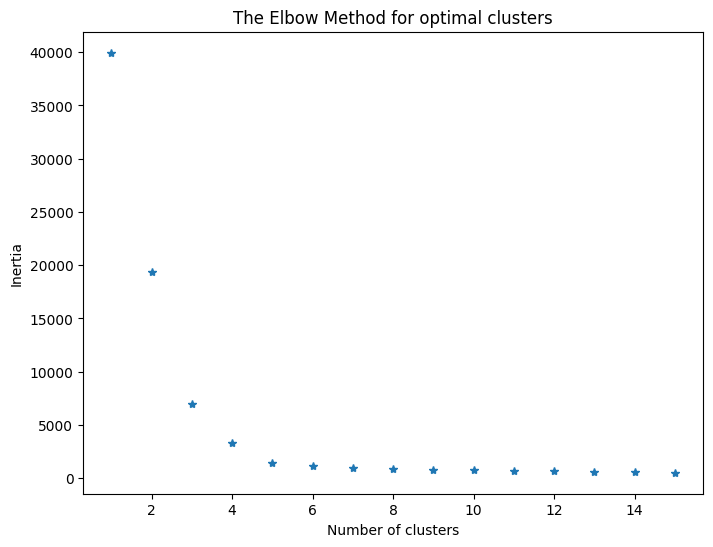

In [58]:
#Part 2b
#Construct a blob dataset with random number of centers from [5..8] .
#Find the optimum number for K, then run Kmeans with your selected optimum K.

#Generate a random number of cluster centers, between 5 and 8 inclusive.
#(i.e. how many clusters to generate from make_blobs)
#Generate 500 samples with standard deviation of 1.
#centers = None
#data, blob = None

centers = np.random.randint(5, 9)
data, blob = make_blobs(n_samples=500, centers=centers, cluster_std=1, random_state=42)

inertia_values = []

#Find the optimum K
#Loop over 1 to 15 clusters
#   Instantiate KMeans object
#   Fit the model
#   Save the cluster labels,  cluster centers, and inertia (performance measure)
"""
for None in None:
    km = None
    km = None
    km_labels = None
    km_cluster_centers = None
    km_inertia = None

"""
for i in range(1, 16):
    # Instantiate KMeans object
    km = KMeans(n_clusters=i, random_state=42)

    # Fit the model
    km.fit(data)

    # Save inertia
    inertia_values.append(km.inertia_)

#Plot the Elbow curve

plt2.figure(figsize=(8, 6))
plt2.plot(range(1, 16), inertia_values, '*')
plt2.xlabel('Number of clusters')
plt2.ylabel('Inertia')
plt2.title('The Elbow Method for optimal clusters')


plt2.show()


In [59]:
#Based on the elbow method, optimum value of K=4

n_clusters_optimum=4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers [[ 3.31724556  3.11093017]
 [ 6.82929179 -5.60651918]
 [-6.40471588 -6.60672181]
 [-7.12349971  8.57791746]]
Cluster labels: [1 2 3 2 0 2 2 0 0 2 3 0 1 1 1 3 0 0 1 1 3 3 3 1 1 1 3 3 2 0 3 3 0 3 0 0 3
 3 0 3 3 0 0 3 3 3 3 0 3 1 2 2 0 3 0 2 3 2 2 0 0 2 3 1 3 2 2 3 0 3 1 0 0 2
 1 3 3 2 0 2 2 3 0 3 3 1 2 2 2 0 3 0 2 2 2 3 3 3 0 1 2 3 3 3 0 0 3 1 2 3 2
 3 0 0 2 0 3 2 3 1 2 3 2 3 1 1 2 1 2 0 0 1 1 2 3 2 3 3 1 1 2 2 0 0 0 3 3 3
 3 0 3 2 3 1 3 3 3 0 2 2 1 3 0 3 0 3 0 1 2 1 2 2 3 0 2 0 1 0 2 3 3 3 1 0 3
 0 2 3 0 3 3 3 2 3 0 3 3 1 3 0 1 2 0 3 3 0 1 3 3 3 3 3 2 0 3 3 2 2 1 3 3 3
 3 0 3 0 2 3 2 3 0 3 0 3 0 3 1 3 2 3 3 3 3 0 2 3 3 3 2 0 3 1 3 0 2 2 0 3 2
 3 0 2 0 0 2 0 3 0 0 2 0 2 3 0 3 3 1 0 0 3 2 2 3 0 3 2 3 1 0 3 3 3 0 3 0 3
 2 2 2 2 3 1 0 2 0 2 2 3 3 2 2 0 3 0 0 3 3 3 2 3 2 3 2 2 2 2 3 3 2 2 1 0 1
 1 1 2 1 3 0 2 2 2 3 0 2 2 3 2 0 0 0 0 0 3 2 0 0 2 0 2 2 0 2 0 0 0 3 3 0 0
 2 2 0 3 2 1 3 3 1 2 3 1 2 0 3 2 0 1 3 3 3 3 2 3 3 3 2 0 2 3 0 3 0 3 3 1 3
 3 3 3 2 0 0 3 2 3 2 0 0 1 1 3 0 3

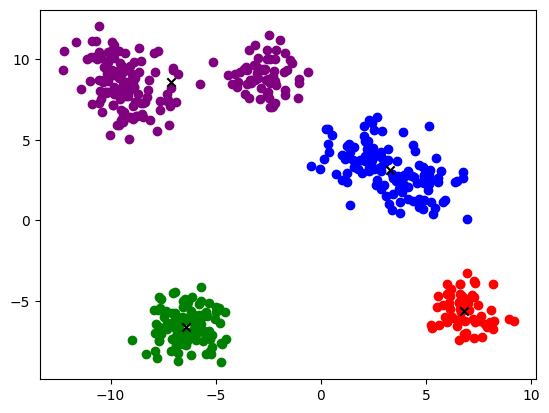

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


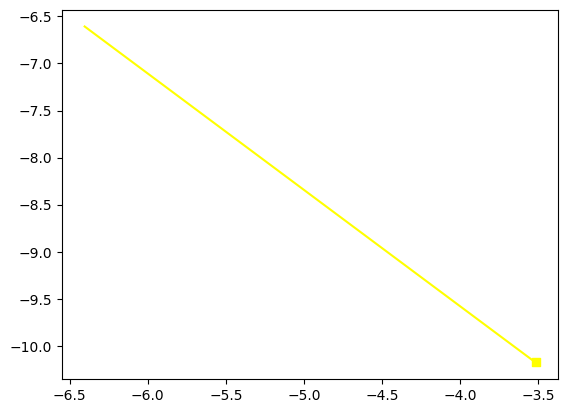

Test point [[ -3.51561688 -10.17695004]] belongs to the cluster with center at [-6.40471588 -6.60672181]
silhouette score: 0.720651233420294


In [60]:
#Now rerun Kmeans with the optimium K determined above

#Instantiate Kmeans from the sklearn library
#Set the number of clusters to optimum K, and the init parameter to 'random' (random cluster center positions)
"""

km = None

#Fit the model
km = None

#Save the cluster labels,  cluster centers, and inertia (performance measure)
km_labels = None
km_cluster_centers = None
km_inertia = None

"""


km = KMeans(n_clusters=n_clusters_optimum, init='random', random_state=42)

# Fit the model
km.fit(data)

# Save the cluster labels, cluster centers, and inertia
km_labels = km.labels_
km_cluster_centers = km.cluster_centers_
km_inertia = km.inertia_

#Visualize the dataset with cluster centers and test point mapped to best cluster center
#Use your own function or the provided function calls (based on the previous plot functions)
print('Cluster centers', km_cluster_centers)
print('Cluster labels:', km_labels)
plot_clusters(data, km_labels, n_clusters_optimum, km_cluster_centers )
plot_test_point(data, km_cluster_centers)


#Calculate the silhouette score
#silhouette_score = None

silhouette_score = metrics.silhouette_score(data, km_labels)

print('silhouette score:', silhouette_score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers [[-0.20351998  0.58579303]
 [ 1.19580065 -0.07517809]]
Cluster labels: [1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1
 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0
 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0
 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1
 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1
 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0
 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0
 1 1 0 1 1 1 

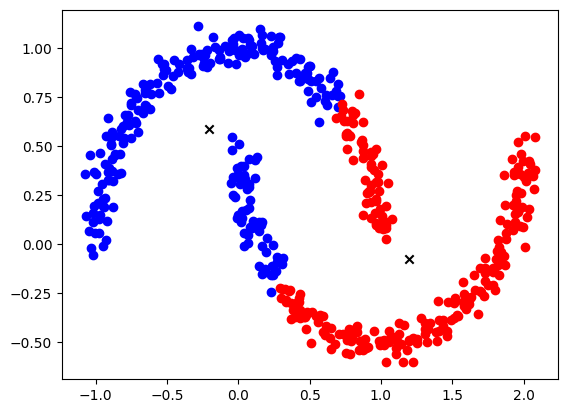

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


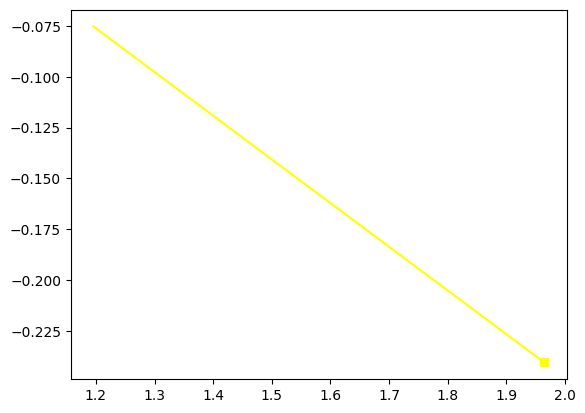

Test point [[ 1.96462855 -0.24059629]] belongs to the cluster with center at [ 1.19580065 -0.07517809]
silhouette score moons: 0.4889817730476176


TestResults(failed=0, attempted=1)

In [61]:
#Part 2c
#Construct a moons dataset with 500 samples and noise parameter 0.05
from sklearn import cluster, datasets, mixture

#data, moons = None

data, moons = datasets.make_moons(n_samples=500, noise=0.05, random_state=42)


#Instantiate Kmeans from the sklearn library
#Set the number of clusters to 2, and the init parameter to 'random' (random cluster center positions)
#km = None

km = cluster.KMeans(n_clusters=2, init='random', random_state=42)

#Fit the model
#km = None

km.fit(data)

#Save the cluster labels,  cluster centers, and inertia (performance measure)
#km_labels = None
#km_cluster_centers = None
#km_inertia = None

km_labels = km.labels_
km_cluster_centers = km.cluster_centers_
km_inertia = km.inertia_



#Visualize the dataset with cluster centers and test point mapped to best cluster center
#Use your own function or the provided function calls (based on the previous plot functions)
print('Cluster centers', km_cluster_centers)
print('Cluster labels:', km_labels)

plot_clusters(data, km_labels, 2, km_cluster_centers )
plot_test_point(data, km_cluster_centers)


#Calculate the silhouette score
#silhouette_score = None

silhouette_score = metrics.silhouette_score(data, km_labels)

print('silhouette score moons:', silhouette_score)

import doctest
"""
   >>> print(np.round(metrics.silhouette_score(data, km_labels), 2))
   0.49

"""

doctest.testmod()
